<a href="https://colab.research.google.com/github/spacemaninSeoul/road_to_NLPmaster/blob/main/Vector_Similarity_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

벡터의 유사도

문장이나 문서의 유사도를 구하는 작업은 자연어 처리의 주요 주제 중 하나입니다. 사람들이 인식하는 문서의 유사도는 주로 문서들 간에 동일한 단어 또는 비슷한 단어가 얼마나 공통적으로 많이 사용되었는지에 의존합니다. 기계도 마찬가지입니다. **기계가 계산하는 문서의 유사도의 성능은 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지(DTM, Word2Vec 등), 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산했는지에 달려있습니다.**

https://www.kernix.com/blog/similarity-measure-of-textual-documents_p12




# 1. 코사인 유사도

BoW에 기반한 단어 표현 방법인 DTM, TF-IDF, 또는 뒤에서 배우게 될 Word2Vec 등과 같이 단어를 수치화할 수 있는 방법을 이해했다면 이러한 표현 방법에 대해서 코사인 유사도를 이용하여 문서의 유사도를 구하는 게 가능합니다.



## 1) 코사인 유사도(Cosine Similarity)

코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다. 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됩니다. 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다. 이를 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미합니다.

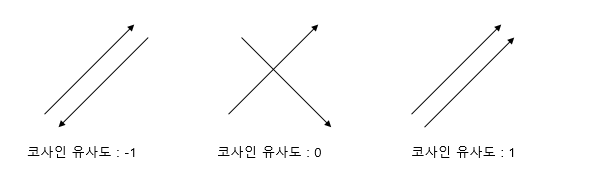



두 벡터 A, B에 대해서 코사인 유사도는 식으로 표현하면 다음과 같습니다.

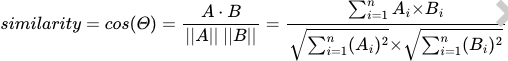


문서 단어 행렬이나 TF-IDF 행렬을 통해서 문서의 유사도를 구하는 경우에는 문서 단어 행렬이나 TF-IDF 행렬이 각각의 특징 벡터 A, B가 됩니다. 예시를 통해 문서 단어 행렬에 대해서 코사인 유사도를 구해봅시다.

문서1 : 저는 사과 좋아요
문서2 : 저는 바나나 좋아요
문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

뛰어쓰기 기준 토큰화를 진행했다고 가정하고, 위의 세 문서에 대해서 문서 단어 행렬을 만들면 이와 같습니다.

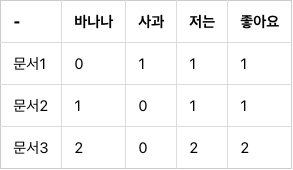

Numpy를 사용해서 코사인 유사도를 계산하는 함수를 구현하고 각 문서 벡터 간의 코사인 유사도를 계산해보겠습니다.

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B) / (norm(A) * norm(B))

doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

print('문서 1과 문서 2의 유사도 :', cos_sim(doc1, doc2))
print('문서 1과 문서 3의 유사도 :', cos_sim(doc1, doc3))
print('문서 2와 문서 3의 유사도 :', cos_sim(doc2, doc3))

문서 1과 문서 2의 유사도 : 0.6666666666666667
문서 1과 문서 3의 유사도 : 0.6666666666666667
문서 2와 문서 3의 유사도 : 1.0000000000000002


눈여겨볼만한 점은 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같다는 점과 문서2와 문서3의 코사인 유사도가 1이 나온다는 것입니다. 앞서 1은 두 벡터의 방향이 완전히 동일한 경우에 1이 나오며, 코사인 유사도 관점에서는 유사도의 값이 최대임을 의미한다고 언급한 바 있습니다.

문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐입니다. 다시 말해 한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이라는 것입니다. 이것이 시사하는 점은 무엇일까요? 예를 들어보겠습니다. 문서 A와 B가 동일한 주제의 문서. 문서 C는 다른 주제의 문서라고 해봅시다. 그리고 문서 A와 문서 C의 문서의 길이는 거의 차이가 나지 않지만, 문서 B의 경우 문서 A의 길이보다 두 배의 길이를 가진다고 가정하겠습니다. 이런 경우 유클리드 거리로 유사도를 연산하면 문서 A가 문서 B보다 문서 C와 유사도가 더 높게 나오는 상황이 발생할 수 있습니다. 이는 유사도 연산에 문서의 길이가 영향을 받았기 때문인데, 이런 경우 코사인 유사도가 해결책이 될 수 있습니다. 코사인 유사도는 유사도를 구할 때 벡터의 방향(패턴)에 초점을 두므로 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와줍니다.



## 2) 유사도를 이용한 추천 시스템 구현하기

캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천 시스템을 만들어보겠습니다. TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반해서 영화를 추천하는 추천 시스템을 만들 수 있습니다.

다운로드 링크 : https://www.kaggle.com/rounakbanik/the-movies-dataset

원본 파일은 위 링크에서 movies_metadata.csv 파일을 다운로드 받으면 됩니다. 해당 데이터는 총 24개의 열을 가진 45,466개의 샘플로 구성된 영화 정보 데이터입니다.

